In [1]:
import SimpleITK as sitk
# from downloaddata import fetch_data as fdata
%matplotlib notebook
from extensies import gui
from extensies import registration_gui as rgui
from extensies import preprocessing as ppcs
from extensies import normalization 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import re 
OUTPUT_DIR = 'output'

In [2]:
df_images = pd.read_csv('../../data/info/ProstateX-Images-Train.csv')
df_findings = pd.read_csv('../../data/info/ProstateX-Findings-Train.csv')
df_ktrans = pd.read_csv('../../data/info/ProstateX-Images-KTrans-Train.csv')

In [27]:
def show_images(fixed_image,moving_image,name,findings):
    pos = findings[findings['ProxID'] == name]['pos']
    for x in pos:
        center = [float(x) for x in x.split()] 
        print(fixed_image.TransformPhysicalPointToContinuousIndex(center),
             moving_image.TransformPhysicalPointToContinuousIndex(center))
        
    initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

    gui.RegistrationPointDataAquisition(fixed_image, moving_image, figure_size=(8,4), known_transformation=initial_transform)

In [28]:
def load_images(name):

    fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(ppcs.get_path(name, 't2tsetra', '../../data/PROSTATEx'))
    moving_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(ppcs.get_path(name, 'adc', '../../data/PROSTATEx'))

    t2w_image = sitk.ReadImage(fixed_series_filenames, sitk.sitkFloat32)
    adc_image = sitk.ReadImage(moving_series_filenames, sitk.sitkFloat32)
    ktrans_image = sitk.ReadImage(os.path.join('../../data/','Ktrans',name,name +'-Ktrans.mhd'), sitk.sitkFloat32)
    
    return t2w_image,adc_image,ktrans_image

In [40]:
df_findings.loc[155]

ProxID              ProstateX-0106
fid                              1
pos        11.6356 42.7856 21.9458
zone                            PZ
ClinSig                      False
Name: 155, dtype: object

In [35]:
df_findings = df_findings.drop(154)

(224.56490233107166, 235.12085663769957, 8.02601951717554) (88.9141333195893, 67.0103773384514, 23.783461244509255)
(200.6286614024885, 261.4476016947988, -8.93183518791741) (81.46586665078398, 77.43767498006854, 6.999977871281796)
(168.8595110112405, 266.50694686569244, -8.389728905357792) (70.86051331711434, 79.07724249621289, 7.4999839104443335)
(136.65571228807423, 239.95609100009864, -8.06492080485222) (60.1170799855989, 70.21398409716018, 7.52456186264776)
(196.71067751330708, 209.2669294369905, -13.764579978763027) (80.31093332091685, 60.537839621445805, 1.7386892239131235)


<IPython.core.display.Javascript object>


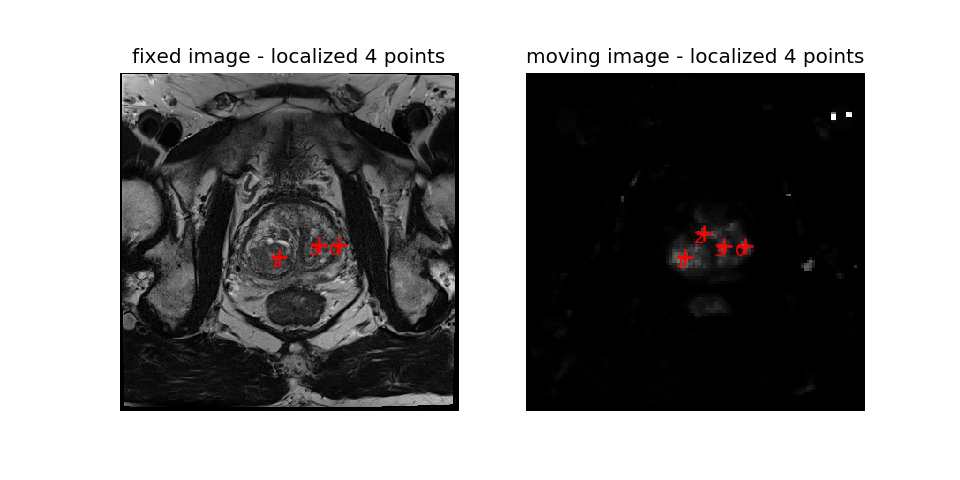

In [32]:
name = 'ProstateX-0025'

t2w_image,adc_image,ktrans_image = load_images(name)
show_images(t2w_image, ktrans_image, name, df_findings)

In [25]:
show_images(t2w_image,ktrans_image,df_findings)

NameError: name 'name' is not defined

In [5]:
df_images

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0000,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0000,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0000,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0000,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0000,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8
5,ProstateX-0000,t2_tse_cor0,1,25.7457 31.8707 -38.511,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
6,ProstateX-0000,t2_tse_sag0,1,25.7457 31.8707 -38.511,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
7,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
8,ProstateX-0000,tfl_3d_PD_ref_tra_1_5x1_5_t30,1,25.7457 31.8707 -38.511,"1.5,3.00503e-010,0.00377059,-58.4317,-0.000597...",56 75 7,1.0,3.0000,"1.5,1.5,3",128x128x16x1,tfl_3d PD ref_tra_1.5x1.5_t3,9
9,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIX_ADC0,1,-40.5367071921656 29.320722668457 -16.70766907...,"2,4.10207e-010,-4.64581e-017,-107.955,-4.0773e...",34 63 10,1.0,3.0000,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_MIX_ADC,8


In [6]:
df_images['DCMSerDescr'].value_counts()

ep2d_diff_tra_DYNDIST                            795
t2_tse_tra                                       412
t2_tse_sag                                       358
t2_tse_cor                                       339
tfl_3d PD ref_tra_1.5x1.5_t3                     326
tfl_3d dynamisch fast                            315
ep2d_diff_tra_DYNDIST_ADC                        265
ep2d_diff_tra_DYNDISTCALC_BVAL                   265
ep2d_diff_tra_DYNDIST_MIX                        192
t2_loc sag                                       151
t2_localizer                                     144
ep2d_diff_tra_DYNDIST_MIXCALC_BVAL                64
ep2d_diff_tra_DYNDIST_MIX_ADC                     64
diffusie-3Scan-4bval_fs                           27
diffusie-3Scan-4bval_fs_ADC                        9
diffusie-3Scan-4bval_fsCALC_BVAL                   9
tfl_3d PD reference                                9
ep2d_diff_tra2x2_Noise0_FS_DYNDIST                 6
t2_localizer_prostate                         

In [1]:
[1,0,1,0]==[1,0,1,0]

True